In [58]:
import os
import sys
import pandas as pd
import numpy as np
import scanpy as sc
import skimage as ski
from scipy.sparse import csr_matrix
from anndata import AnnData
from matplotlib import pyplot as plt
sys.path.append('Python_function')
from ST_preprocess import gem2adata

In [9]:
gem_data = pd.read_csv("data/Mouse1_T186.gem.gz", sep='\s+', header=0,comment='#')

In [19]:
gem_data

,chip,gene,x,y,umi_count,cell_id,gene_area,rx,ry,mask
0,T186,0610005C13Rik,778,5459,1,30817,1143,778,5459,254
1,T186,0610005C13Rik,824,6381,1,37869,1143,824,6381,254
2,T186,0610005C13Rik,1359,5905,1,34130,1143,1359,5905,218
3,T186,0610005C13Rik,1702,6605,1,39287,1144,1702,6605,254
4,T186,0610005C13Rik,1823,4764,2,25767,1144,1823,4764,254
...,...,...,...,...,...,...,...,...,...,...
61397067,T186,mt-Nd6,11920,991,1,0,1144,11920,991,66
61397068,T186,mt-Nd6,11946,1360,1,4237,1144,11946,1360,132
61397069,T186,mt-Nd6,12014,1352,1,0,1144,12014,1352,132
61397070,T186,mt-Nd6,12035,957,1,0,0,12035,957,44


In [10]:
adata = gem2adata(gem_data,geneID='gene',MIDCounts='umi_count',bin=50)

/mnt/SSD4Ta/home/huangzhi/anaconda3/envs/work/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [20]:
adata

AnnData object with n_obs × n_vars = 24677 × 22857
    obs: 'coor_x', 'coor_y', 'nCount_RNA', 'nFeature_RNA'
    obsm: 'spatial'

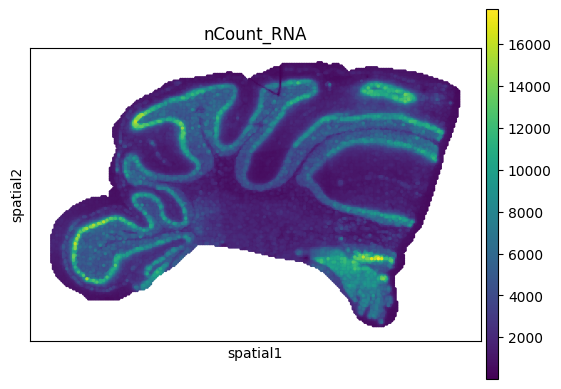

In [21]:
sc.pl.spatial(adata,color="nCount_RNA",spot_size=2)

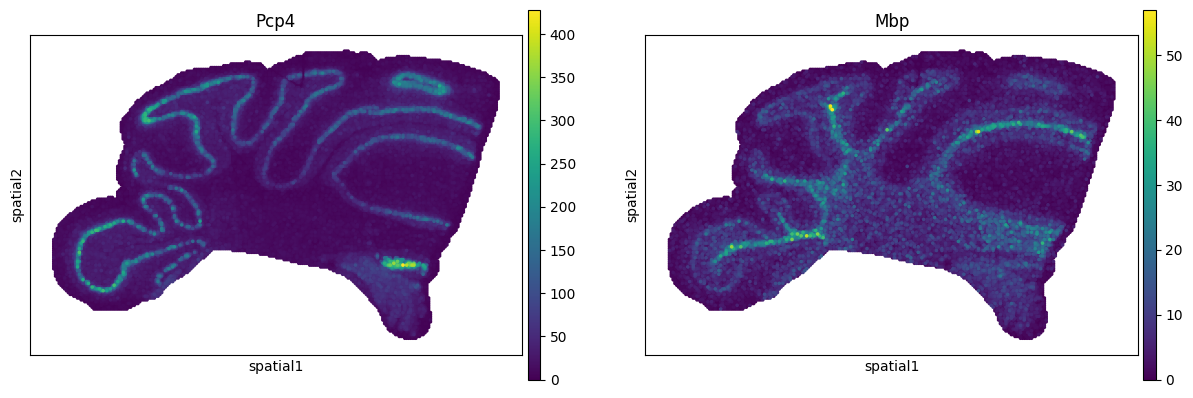

In [17]:
sc.pl.spatial(adata,color=['Pcp4','Mbp'],spot_size=2)

In [15]:
adata.write_h5ad('Mouse_cerebellum.h5ad', compression='lzf')

In [13]:
adata = sc.read_h5ad('Mouse_cerebellum.h5ad')

In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.leiden(adata, resolution=0.8)
sc.tl.umap(adata)

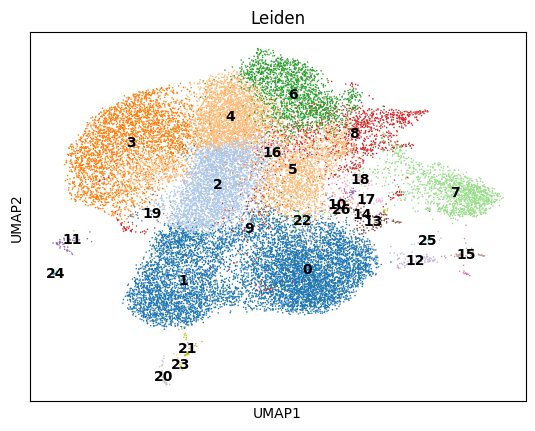

In [10]:
sc.pl.umap(adata, color='leiden', 
           legend_loc='on data', 
           title='Leiden', palette='tab20')

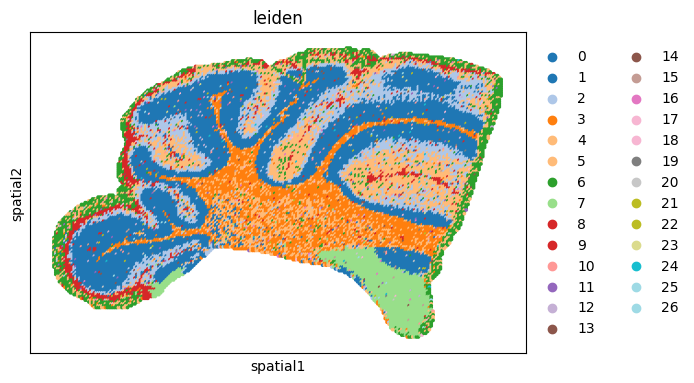

In [11]:
sc.pl.spatial(adata,
              color="leiden",
              spot_size=2, 
              palette='tab20')

In [12]:
adata.write_h5ad('Mouse_cerebellum.cluster.h5ad', compression='lzf')

In [82]:
adata = sc.read_h5ad('Mouse_cerebellum.cluster.h5ad')

In [32]:
adata.obs

,coor_x,coor_y,nCount_RNA,nFeature_RNA,leiden
cell,,,,,
1_106,1.0,106.0,1536,753,6
1_107,1.0,107.0,1447,732,5
1_108,1.0,108.0,1497,756,6
1_109,1.0,109.0,1499,745,6
1_110,1.0,110.0,1682,821,5
...,...,...,...,...,...
244_25,244.0,25.0,465,293,6
244_26,244.0,26.0,449,320,6
244_27,244.0,27.0,430,266,6


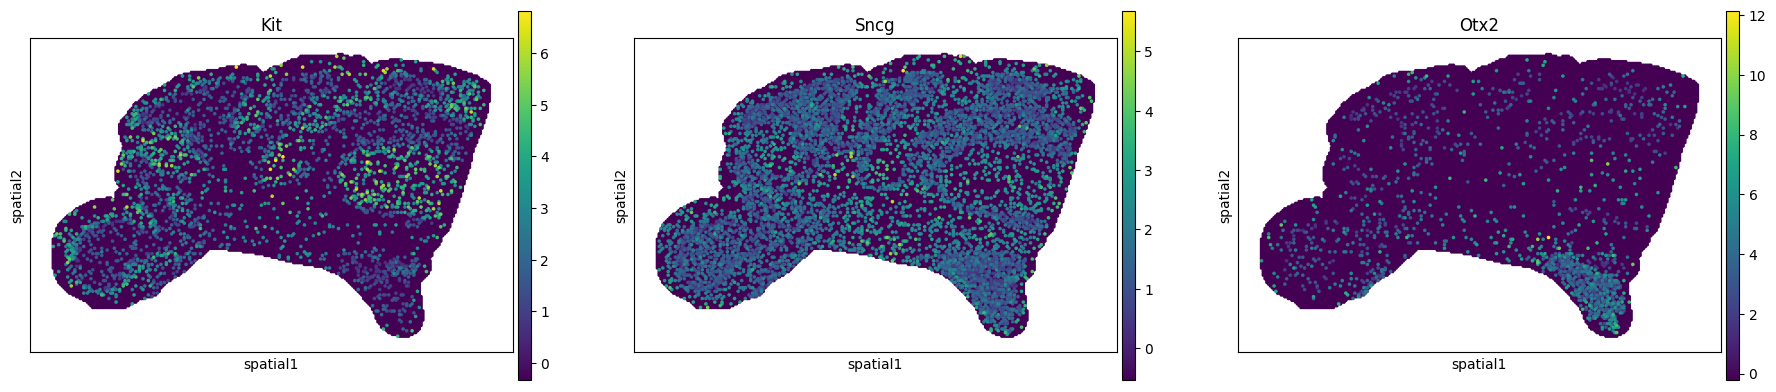

In [83]:
sc.pl.spatial(adata,color=['Kit','Sncg','Otx2'],spot_size=2)

In [84]:
gene_index = adata.var.index.isin(['Kit', 'Sncg'])
gene_list = adata.var.index[gene_index]
adata.obs[gene_list] = adata.X[:,gene_index]

In [34]:
adata.obs

,coor_x,coor_y,nCount_RNA,nFeature_RNA,leiden,Kit,Sncg
cell,,,,,,,
1_106,1.0,106.0,1536,753,6,-0.332402,-0.543863
1_107,1.0,107.0,1447,732,5,-0.332402,-0.543863
1_108,1.0,108.0,1497,756,6,-0.332402,-0.543863
1_109,1.0,109.0,1499,745,6,-0.332402,-0.543863
1_110,1.0,110.0,1682,821,5,3.939548,-0.543863
...,...,...,...,...,...,...,...
244_25,244.0,25.0,465,293,6,-0.332402,-0.543863
244_26,244.0,26.0,449,320,6,-0.332402,-0.543863
244_27,244.0,27.0,430,266,6,-0.332402,-0.543863


In [85]:
img = np.zeros( shape=(int(adata.obs['coor_y'].max()+1),int(adata.obs['coor_x'].max()+1)),dtype=float)

In [41]:
img,img.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (161, 245))

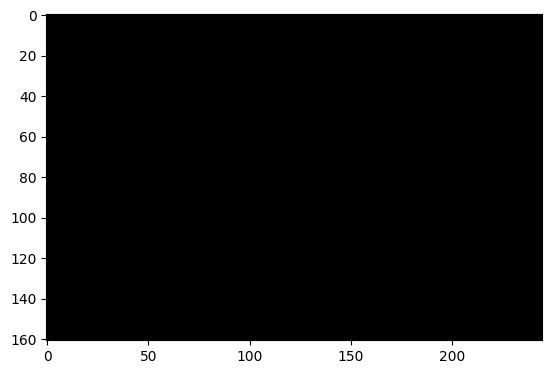

In [43]:
plt.imshow(img,cmap='gray')

In [47]:
img[adata.obs['coor_y'].astype('int'),adata.obs['coor_x'].astype('int')] = adata.obs['Kit']

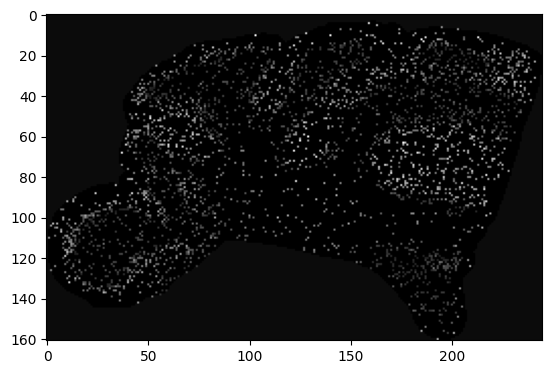

In [48]:
plt.imshow(img,cmap='gray')

In [61]:
from scipy.ndimage import maximum_filter, minimum_filter, convolve, gaussian_filter
#最小值滤波
filter_img = maximum_filter(img, size=3)
#最大值滤波
filter_img = minimum_filter(img, size=3)
#均值滤波
filter_img = convolve(img, np.matrix([[1,1,1],
                                      [1,1,1],
                                      [1,1,1]])/9)
#高斯滤波
filter_img = convolve(img, np.matrix([[1,2,1],
                                      [2,4,2],
                                      [1,2,1]])/16)
filter_img = gaussian_filter(img,sigma=1)

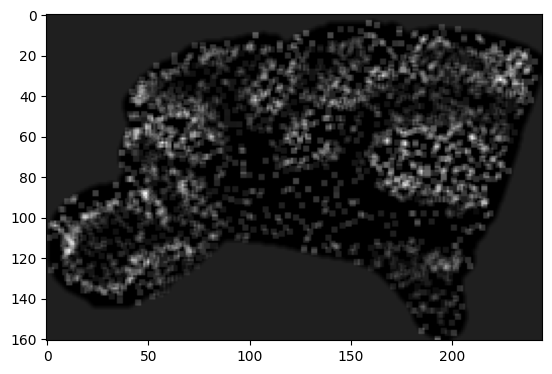

In [60]:
filter_img = convolve(img, np.matrix([[1,1,1],
                                      [1,1,1],
                                      [1,1,1]])/9)
plt.imshow(filter_img,cmap='gray')

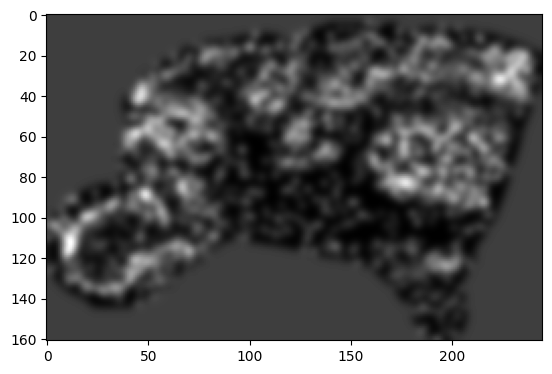

In [74]:
filter_img = gaussian_filter(img,sigma=1)
for i in range(1,5):
    filter_img = gaussian_filter(filter_img,sigma=1)
plt.imshow(filter_img,cmap='gray')

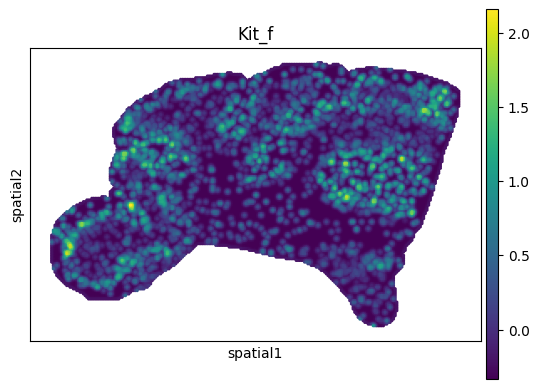

In [76]:
filter_img = gaussian_filter(img,sigma=1)
adata.obs['Kit_f'] = filter_img[adata.obs['coor_y'].astype('int'),adata.obs['coor_x'].astype('int')]
sc.pl.spatial(adata,color=['Kit_f'],spot_size=2)

In [79]:
from sklearn.neighbors import KDTree
kdt = KDTree(adata.obs[['coor_x','coor_y']],metric='euclidean')
distance,result = kdt.query(adata.obs[['coor_x','coor_y']], k=9, return_distance=True)
distance,result

(array([[0.        , 1.        , 1.        , ..., 2.        , 2.23606798,
         2.23606798],
        [0.        , 1.        , 1.        , ..., 2.        , 2.        ,
         2.23606798],
        [0.        , 1.        , 1.        , ..., 2.        , 2.        ,
         2.        ],
        ...,
        [0.        , 1.        , 1.        , ..., 2.        , 2.        ,
         2.        ],
        [0.        , 1.        , 1.        , ..., 2.        , 2.        ,
         2.23606798],
        [0.        , 1.        , 1.        , ..., 2.        , 2.23606798,
         2.23606798]]),
 array([[    0,    20,     1, ...,     2,    48,    22],
        [    1,     2,     0, ...,    48,     3,    23],
        [    2,     3,     1, ...,    49,     0,     4],
        ...,
        [24674, 24675, 24673, ..., 24672, 24676, 24638],
        [24675, 24674, 24676, ..., 24639, 24673, 24638],
        [24676, 24660, 24675, ..., 24674, 24639, 24658]]))

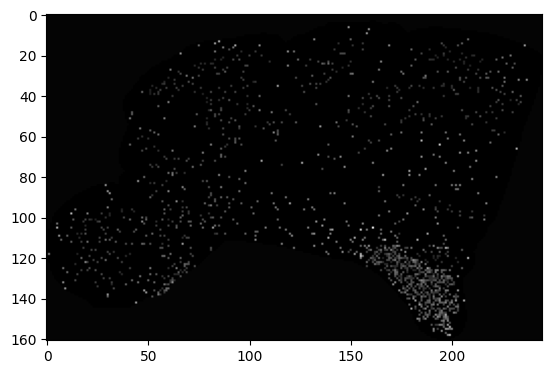

In [107]:
gene_index = adata.var.index.isin(['Otx2'])
gene_list = adata.var.index[gene_index]
adata.obs[gene_list] = adata.X[:,gene_index]
img = np.zeros( shape=(int(adata.obs['coor_y'].max()+1),
                       int(adata.obs['coor_x'].max()+1)),dtype=float)
img[adata.obs['coor_y'].astype('int'),
    adata.obs['coor_x'].astype('int')] = adata.obs['Otx2']
plt.imshow(img,cmap='gray')

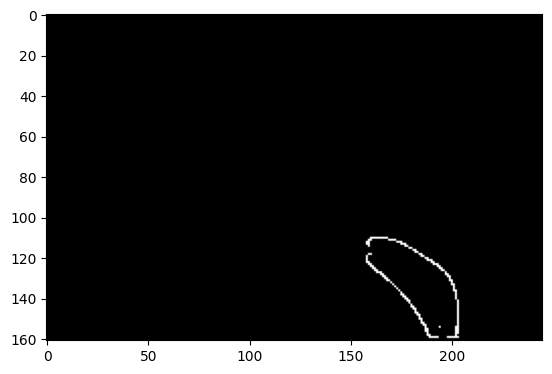

In [108]:
from skimage import feature
edges1 = feature.canny(img, sigma=8)
plt.imshow(edges1,cmap='gray')

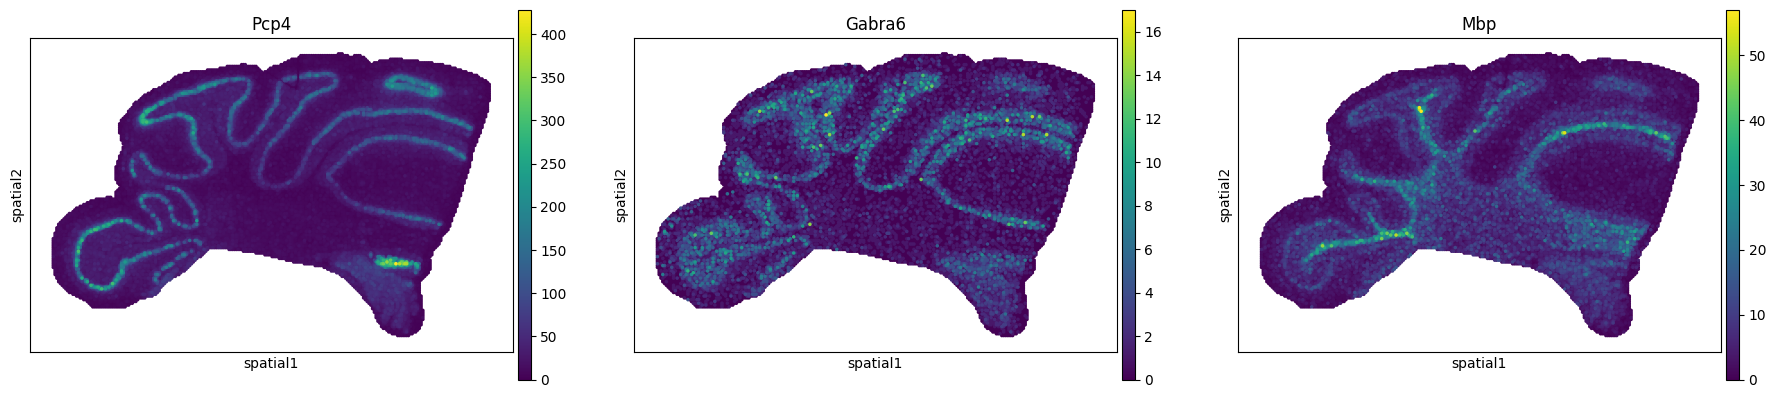

In [115]:
sc.pl.spatial(adata,color=['Pcp4','Gabra6','Mbp'],spot_size=2,layer='counts')

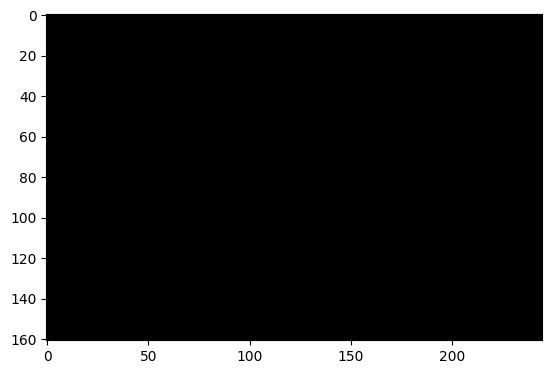

In [129]:
img = np.zeros( shape=(int(adata.obs['coor_y'].max()+1),
                       int(adata.obs['coor_x'].max()+1),3),dtype=float)
plt.imshow(img,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..428.0].


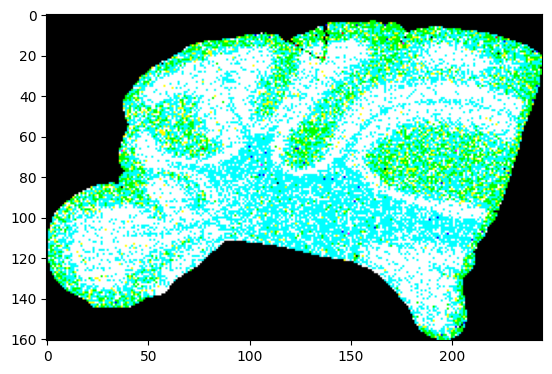

In [130]:
gene_index = adata.var.index.isin(['Pcp4','Gabra6','Mbp'])
gene_list = adata.var.index[gene_index]
adata.obs[gene_list] = adata.layers['counts'][:,gene_index].toarray()
img[adata.obs['coor_y'].astype(int),adata.obs['coor_x'].astype(int),0] = adata.obs['Gabra6']
img[adata.obs['coor_y'].astype(int),adata.obs['coor_x'].astype(int),1] = adata.obs['Pcp4']
img[adata.obs['coor_y'].astype(int),adata.obs['coor_x'].astype(int),2] = adata.obs['Mbp']
plt.imshow(img,cmap='gray')

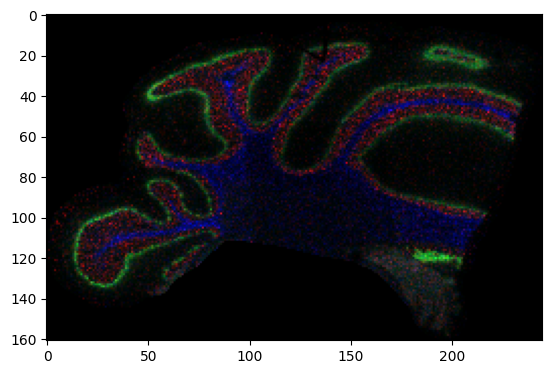

In [131]:
img[:,:,0] = (img[:,:,0] - np.min(img[:,:,0] ))/(np.max(img[:,:,0]) - np.min(img[:,:,0]))
img[:,:,1] = (img[:,:,1] - np.min(img[:,:,1] ))/(np.max(img[:,:,1]) - np.min(img[:,:,1]))
img[:,:,2] = (img[:,:,2] - np.min(img[:,:,2] ))/(np.max(img[:,:,2]) - np.min(img[:,:,2]))
plt.imshow(img,cmap='gray')

In [132]:
import skimage
img = img*255
img = img.astype('uint8')
skimage.io.imsave('Gene.RGB.tif',img)

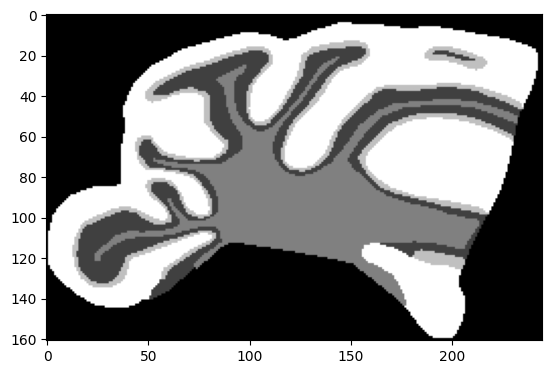

In [209]:
mask = skimage.io.imread("Layer_Mask.tif")
plt.imshow(mask,cmap='gray')

In [140]:
adata.obs = adata.obs[['coor_x','coor_y','nCount_RNA','nFeature_RNA','leiden']]

In [210]:
adata.obs.loc[:,'mask'] = mask[adata.obs['coor_y'].astype(int),
                               adata.obs['coor_x'].astype(int)]
adata.obs

,coor_x,coor_y,nCount_RNA,nFeature_RNA,leiden,mask,anatomy
cell,,,,,,,
1_106,1.0,106.0,1536,753,6,0,Background
1_107,1.0,107.0,1447,732,5,200,Molecular Layer
1_108,1.0,108.0,1497,756,6,200,Molecular Layer
1_109,1.0,109.0,1499,745,6,200,Molecular Layer
1_110,1.0,110.0,1682,821,5,200,Molecular Layer
...,...,...,...,...,...,...,...
244_25,244.0,25.0,465,293,6,0,Background
244_26,244.0,26.0,449,320,6,0,Background
244_27,244.0,27.0,430,266,6,0,Background


In [211]:
adata.obs.loc[:,'anatomy'] = adata.obs.loc[:,'mask'].map(
    {0:'Background',50:'Granlar Layer',100:'White Matter',
     150:'Purkinje Layer',200:'Molecular Layer'})
adata.obs

,coor_x,coor_y,nCount_RNA,nFeature_RNA,leiden,mask,anatomy
cell,,,,,,,
1_106,1.0,106.0,1536,753,6,0,Background
1_107,1.0,107.0,1447,732,5,200,Molecular Layer
1_108,1.0,108.0,1497,756,6,200,Molecular Layer
1_109,1.0,109.0,1499,745,6,200,Molecular Layer
1_110,1.0,110.0,1682,821,5,200,Molecular Layer
...,...,...,...,...,...,...,...
244_25,244.0,25.0,465,293,6,0,Background
244_26,244.0,26.0,449,320,6,0,Background
244_27,244.0,27.0,430,266,6,0,Background


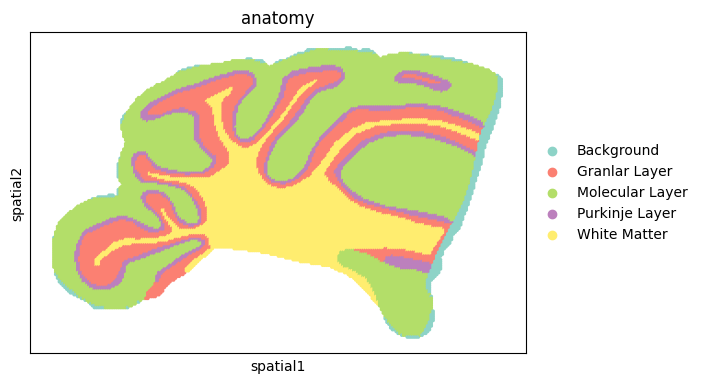

In [212]:
sc.pl.spatial(adata,
              color="anatomy",
              spot_size=2, 
              palette='Set3')

In [137]:
mask,type(mask)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 numpy.ndarray)

In [206]:
Border = pd.read_csv('layer_border.txt',sep='\t')
grouped = Border.groupby('line_id')
segments = []
for line_id, group in grouped:
    for i in range(len(group) - 1):
        start_point = group.iloc[i]
        end_point = group.iloc[i + 1]
        
        segments.append({
            'x_start': start_point['x'],
            'y_start': start_point['y'],
            'x_end': end_point['x'],
            'y_end': end_point['y'],
            'line_id': line_id
        })
segments = pd.DataFrame(segments)

In [200]:
segments

,x_start,y_start,x_end,y_end,line_id
0,202.370,19.489,199.744,20.913,0020-0202
1,199.744,20.913,199.840,20.943,0020-0202
2,199.840,20.943,199.935,20.972,0020-0202
3,199.935,20.972,200.031,21.002,0020-0202
4,200.031,21.002,200.126,21.031,0020-0202
...,...,...,...,...,...
39024,52.773,134.480,52.715,134.562,0135-0054
39025,52.715,134.562,52.665,134.649,0135-0054
39026,52.665,134.649,52.616,134.736,0135-0054
39027,52.616,134.736,51.430,136.823,0135-0054


In [204]:
segments.to_csv('Border_sort.csv')

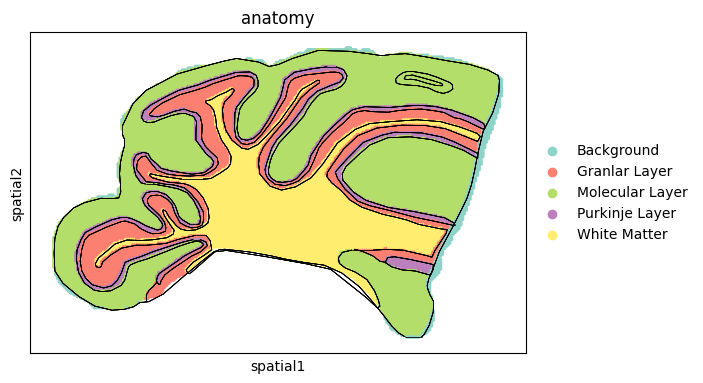

In [207]:
import matplotlib.pyplot as plt
x_start, y_start = 87.888, 113.711
x_end, y_end = 231.355, 60.795
fig, ax = plt.subplots()
sc.pl.spatial(adata,ax=ax,show=False,
              color="anatomy",
              spot_size=2, 
              palette='Set3')
for i in pd.unique(segments['line_id']):
    line = segments[segments['line_id']==i].copy()
    ax.plot(
        [line['x_start'], line['x_end']], [line['y_start'], line['y_end']],
        color='black',  
        linewidth=0.5, 
        linestyle='-', 
    )
plt.show()

In [3]:
import os

In [229]:
files_list = os.listdir('data/Mouse_registration/')
files_list

['T345.h5ad.csv',
 'T346.h5ad.csv',
 'T347.h5ad.csv',
 'T348.h5ad.csv',
 'T349.h5ad.csv',
 'T350.h5ad.csv',
 'T351.h5ad.csv',
 'T352.h5ad.csv',
 'T353.h5ad.csv',
 'T354.h5ad.csv',
 'T355.h5ad.csv',
 'T356.h5ad.csv',
 'T357.h5ad.csv',
 'T358.h5ad.csv',
 'T360.h5ad.csv',
 'T361.h5ad.csv',
 'T362.h5ad.csv',
 'T363.h5ad.csv',
 'T364.h5ad.csv',
 'T365.h5ad.csv',
 'T366.h5ad.csv',
 'T367.h5ad.csv',
 'T368.h5ad.csv',
 'T369.h5ad.csv',
 'T370.h5ad.csv',
 'T371.h5ad.csv',
 'T372.h5ad.csv',
 'T373.h5ad.csv']

In [228]:
tmp_obs = pd.read_csv('data/Mouse_registration/T345.h5ad.csv')
tmp_obs

,Unnamed: 0,nCount_RNA,nFeature_RNA,x,y,annotation
0,528_163,1366,662,528,163,purkinje layer
1,507_162,1188,616,507,162,purkinje layer
2,556_210,503,298,556,210,molecular layer
3,538_162,518,295,538,162,molecular layer
4,524_162,555,333,524,162,granular layer
...,...,...,...,...,...,...
4955,560_197,14,6,560,197,molecular layer
4956,510_198,6,5,510,198,molecular layer
4957,490_128,3,2,490,128,molecular layer
4958,558_208,1,1,558,208,molecular layer


In [60]:
files_list = os.listdir('data/Mouse_registration/')

for i in files_list:
    tmp_obs = pd.read_csv(f'data/Mouse_registration/{i}')
    img = np.zeros( shape=(int(tmp_obs['y'].max()+1),int(tmp_obs['x'].max()+1)),dtype=float)
    img[ tmp_obs['y'], tmp_obs['x']] = tmp_obs['nCount_RNA']
    img = ((img-np.min(img))*255/(np.max(img)-np.min(img))).astype('uint8')
    ski.io.imsave(f'raw_img/{i}.tif',img)

In [3]:
from xml.dom.minidom import parse
import xml.dom.minidom
sys.path.append('Python_function')
from ST_preprocess import get_xml_matrix, trakEM_transform

In [7]:
xml_matrix = get_xml_matrix('untitled.xml')
xml_matrix['slice'] = [i.split('.')[0] for i in xml_matrix['title'].tolist()]

In [9]:
xml_matrix

,title,matrix,slice
0,T345.h5ad.csv.tif,"-0.9964611650569898,0.0840544260183147,-0.0840...",T345
1,T346.h5ad.csv.tif,"0.15308253573620278,0.9882134067359005,-0.9882...",T346
2,T347.h5ad.csv.tif,"0.10617493383625137,0.9943474661429315,-0.9943...",T347
3,T348.h5ad.csv.tif,"0.0863013221905829,-0.996269081015845,0.996269...",T348
4,T349.h5ad.csv.tif,"-0.9792637238271379,0.20258963249931844,-0.202...",T349
5,T350.h5ad.csv.tif,"0.1437961035383405,0.989607336577085,-0.989607...",T350
6,T351.h5ad.csv.tif,"0.07052360550122305,0.9975101107593386,-0.9975...",T351
7,T352.h5ad.csv.tif,"-0.9999997553216676,-6.995402810334665E-4,6.99...",T352
8,T353.h5ad.csv.tif,"0.9986022027155014,-0.052854902627370914,0.052...",T353
9,T354.h5ad.csv.tif,"0.08009183447665104,-0.9967874889113352,0.9967...",T354


In [89]:
def trakEM_transform(ix, iy, matrix, matrix_bin,transform_bin):
    affine = np.zeros((3, 3))
    matrix = np.array(matrix.split(',')).astype(float).reshape((3, 2))
    affine[0:2, :] = matrix.T
    affine[2] = [0, 0, 1]
    
    gem_data = pd.DataFrame({'x': ix, 'y': iy})
    gem_data['i'] = 1
    scale = np.matrix([[transform_bin / matrix_bin, 0, 0],
                       [0, transform_bin / matrix_bin, 0],
                       [0, 0, 1]])

    affine = (scale.I).dot(affine).dot(scale)
    new_coor = (affine.dot([gem_data['x'], gem_data['y'], gem_data['i']])).T
    rx = new_coor[:, 0]
    ry = new_coor[:, 1]
    return rx, ry

In [90]:
tmp_obs = pd.read_csv('data/Mouse_registration/T345.h5ad.csv')
rx, ry = trakEM_transform(tmp_obs['x'], tmp_obs['y'],
                          xml_matrix.loc[xml_matrix['slice']=='T345','matrix'].item(),
                          matrix_bin=25,transform_bin=25)
tmp_obs['rx'] = rx
tmp_obs['ry'] = ry
tmp_obs

,Unnamed: 0,nCount_RNA,nFeature_RNA,x,y,annotation,rx,ry
0,528_163,1366,662,528,163,purkinje layer,196.150652,323.948329
1,507_162,1188,616,507,162,purkinje layer,217.160391,323.179647
2,556_210,503,298,556,210,molecular layer,164.299181,279.468178
3,538_162,518,295,538,162,molecular layer,186.270095,325.785335
4,524_162,555,333,524,162,granular layer,200.220551,324.608573
...,...,...,...,...,...,...,...,...
4955,560_197,14,6,560,197,molecular layer,161.406044,292.758391
4956,510_198,6,5,510,198,molecular layer,211.145048,287.559209
4957,490_128,3,2,490,128,molecular layer,236.958081,355.630402
4958,558_208,1,1,558,208,molecular layer,162.474368,281.629209


In [91]:
files_list = os.listdir('data/Mouse_registration/')

for i in files_list:
    tmp_obs = pd.read_csv(f'data/Mouse_registration/{i}')

    rx, ry = trakEM_transform(tmp_obs['x'], tmp_obs['y'],
                          xml_matrix.loc[xml_matrix['slice']==i.split('.')[0],'matrix'].item(),
                          matrix_bin=25,transform_bin=25)
    tmp_obs['x'] = rx
    tmp_obs['y'] = ry
    tmp_obs['x'] = round(tmp_obs['x'],0).astype('int')
    tmp_obs['y'] = round(tmp_obs['y'],0).astype('int')
    
    img = np.zeros( shape=(int(tmp_obs['y'].max()+1),int(tmp_obs['x'].max()+1)),dtype=float)
    img[ tmp_obs['y'], tmp_obs['x']] = tmp_obs['nCount_RNA']
    img = ((img-np.min(img))*255/(np.max(img)-np.min(img))).astype('uint8')
    ski.io.imsave(f'transform_img/{i}.tif',img)